In [41]:
# compare.py 
import argparse
#from correlation import correlate
import numpy as np
import pandas as pd
import easydict
def initialize():
    #parser = argparse.ArgumentParser()
    #parser.add_argument("-i ", "--source_file", help="source file")
    #parser.add_argument("-o ", "--target_file", help="target file")
    #args = parser.parse_args()
    args = easydict.EasyDict({ 
        "source_file":'C:\\Users\\ril\\Downloads\\sh_293.wav',
        "target_file":'C:\\Users\\ril\\Downloads\\sh_279.wav'
    })
  
    SOURCE_FILE = args.source_file if args.source_file else None
    TARGET_FILE = args.target_file if args.target_file else None
    if not SOURCE_FILE or not TARGET_FILE:
      raise Exception("Source or Target files not specified.")
    return SOURCE_FILE, TARGET_FILE
  
if __name__ == "__main__":
    SOURCE_FILE, TARGET_FILE = initialize()

   

In [42]:
source_file="C:\\Users\\ril\\Downloads\\DripReport - Skechers.mp3"
target_file="C:\\Users\\ril\\Downloads\\Desiigner - Panda.mp3"

In [63]:
import subprocess
import numpy 
 
import os
# seconds to sample audio file for
sample_time = 500
# number of points to scan cross correlation over
span = 150
# step size (in points) of cross correlation
step = 1
# minimum number of points that must overlap in cross correlation
# exception is raised if this cannot be met
min_overlap = 20
# report match when cross correlation has a peak exceeding threshold
threshold = 0.5

# calculate fingerprint
def calculate_fingerprints(filename):
    print("Calculating fingerprint by fpcalc for %s" % (filename))
    fpcalc_out = str(subprocess.check_output(['fpcalc', '-raw', '-length', str(sample_time), filename])).strip().replace('\\n', '').replace("'", "").replace("\\r", "")
    fingerprint_index = fpcalc_out.find('FINGERPRINT=') + 12
    # convert fingerprint to list of integers
    fingerprints = list(map(int, fpcalc_out[fingerprint_index:].split(',')))
    
    return fingerprints
  
# returns correlation between lists
def correlation(listx, listy):
    if len(listx) == 0 or len(listy) == 0:
        # Error checking in main program should prevent us from ever being
        # able to get here.
        raise Exception('Empty lists cannot be correlated.')
    if len(listx) > len(listy):
        listx = listx[:len(listy)]
    elif len(listx) < len(listy):
        listy = listy[:len(listx)]
    
    covariance = 0
    for i in range(len(listx)):
        covariance += 32 - bin(listx[i] ^ listy[i]).count("1")
    covariance = covariance / float(len(listx))
    
    return covariance/32
  
# return cross correlation, with listy offset from listx
def cross_correlation(listx, listy, offset):
    if offset > 0:
        listx = listx[offset:]
        listy = listy[:len(listx)]
    elif offset < 0:
        offset = -offset
        listy = listy[offset:]
        listx = listx[:len(listy)]
    if min(len(listx), len(listy)) < min_overlap:
        # Error checking in main program should prevent us from ever being
        # able to get here.
        return 
    #raise Exception('Overlap too small: %i' % min(len(listx), len(listy)))
    return correlation(listx, listy)
  
# cross correlate listx and listy with offsets from -span to span
def compare(listx, listy, span, step):
    if span > min(len(listx), len(listy)):
        # Error checking in main program should prevent us from ever being
        # able to get here.
        raise Exception('span >= sample size: %i >= %i\n'
                        % (span, min(len(listx), len(listy)))
                        + 'Reduce span, reduce crop or increase sample_time.')
    corr_xy = []
    for offset in numpy.arange(-span, span + 1, step):
        corr_xy.append(cross_correlation(listx, listy, offset))
    return corr_xy
  
# return index of maximum value in list
def max_index(listx):
    max_index = 0
    max_value = listx[0]
    for i, value in enumerate(listx):
        if value > max_value:
            max_value = value
            max_index = i
    return max_index
  
def get_max_corr(corr, source, target):
    max_corr_index = max_index(corr)
    max_corr_offset = -span + max_corr_index * step
    #print ("max_corr_index = ", max_corr_index, "max_corr_offset = ", max_corr_offset)
# report matches
    if corr[max_corr_index] > threshold:
        print("File A: %s" % (source))
        print("File B: %s" % (target))
        print('Match with correlation of %.2f%% at offset %i'
             % (corr[max_corr_index] * 100.0, max_corr_offset))

def correlate(source, target):
    fingerprint_source = calculate_fingerprints(source)
    fingerprint_target = calculate_fingerprints(target)
    
    corr = compare(fingerprint_source, fingerprint_target, span, step)
    max_corr_offset = get_max_corr(corr, source, target)

In [51]:
correlate(source_file, target_file)

Calculating fingerprint by fpcalc for C:\Users\ril\Downloads\DripReport - Skechers.mp3
Calculating fingerprint by fpcalc for C:\Users\ril\Downloads\Desiigner - Panda.mp3
File A: C:\Users\ril\Downloads\DripReport - Skechers.mp3
File B: C:\Users\ril\Downloads\Desiigner - Panda.mp3
Match with correlation of 52.24% at offset -51


In [65]:
source_file1="C:\\Users\\ril\\Downloads\\DripReport - Skechers.mp3"
target_file1="C:\\Users\\ril\\Downloads\\DripReport - Skechers.mp3"
correlate(source_file1, target_file1)

Calculating fingerprint by fpcalc for C:\Users\ril\Downloads\DripReport - Skechers.mp3
Calculating fingerprint by fpcalc for C:\Users\ril\Downloads\DripReport - Skechers.mp3
File A: C:\Users\ril\Downloads\DripReport - Skechers.mp3
File B: C:\Users\ril\Downloads\DripReport - Skechers.mp3
Match with correlation of 100.00% at offset 0


In [67]:
source_file2="C:\\Users\\ril\\Downloads\\[iSongs.info] 02 - Kallolam.mp3"
target_file2="C:\\Users\\ril\\Downloads\\DripReport - Skechers.mp3"
correlate(source_file2, target_file2)

Calculating fingerprint by fpcalc for C:\Users\ril\Downloads\[iSongs.info] 02 - Kallolam.mp3
Calculating fingerprint by fpcalc for C:\Users\ril\Downloads\DripReport - Skechers.mp3
File A: C:\Users\ril\Downloads\[iSongs.info] 02 - Kallolam.mp3
File B: C:\Users\ril\Downloads\DripReport - Skechers.mp3
Match with correlation of 51.98% at offset 145


In [47]:
 fpcalc_out = str(subprocess.check_output(['fpcalc', '-raw', '-length', str(sample_time), source_file])).strip().replace('\\n', '').replace("'", "").replace("\\r", "")

In [48]:
fpcalc_out

'bDURATION=106FINGERPRINT=2435510974,2959798526,2963988710,2964120678,2968315958,2960128005,2955852036,2973678340,3005131268,2991386164,2990851692,2986623740,2987266732,2987276204,3000835244,2998667439,3015444718,2476562654,2480822606,2480832262,2480832262,2482976050,2466004003,2204908579,2171345970,2418949442,2490003266,2499473346,2495258002,3029894306,3029893282,3164115110,3187191950,2939723912,2939728008,3995783400,3928651048,3945410344,3945409320,3911854907,3907595034,3903400714,4172880650,4172880394,3650631178,2610442762,2610443018,2409115914,2411213082,2377675114,2377695721,2364129704,2380824984,2406252952,2389542056,3392118184,3392052216,3393108568,3407800840,1494919688,1478142472,3625625096,4162499081,4162494985,4162363433,3906514984,3919101032,3921193960,2881002124,2860096140,2853869188,2853884580,2920166052,2919629732,3053453733,3082814646,2978094210,2962369730,2962368578,2425698338,2428242019,2426980464,2431170628,2959841476,4083850688,4068130496,2992285376,2991109856,298716

In [56]:
import cv2
img = cv2.imread("D:\\shravanne-tasks\\Screenshot (188).png",cv2.IMREAD_COLOR)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [57]:
import matplotlib.pyplot as plt

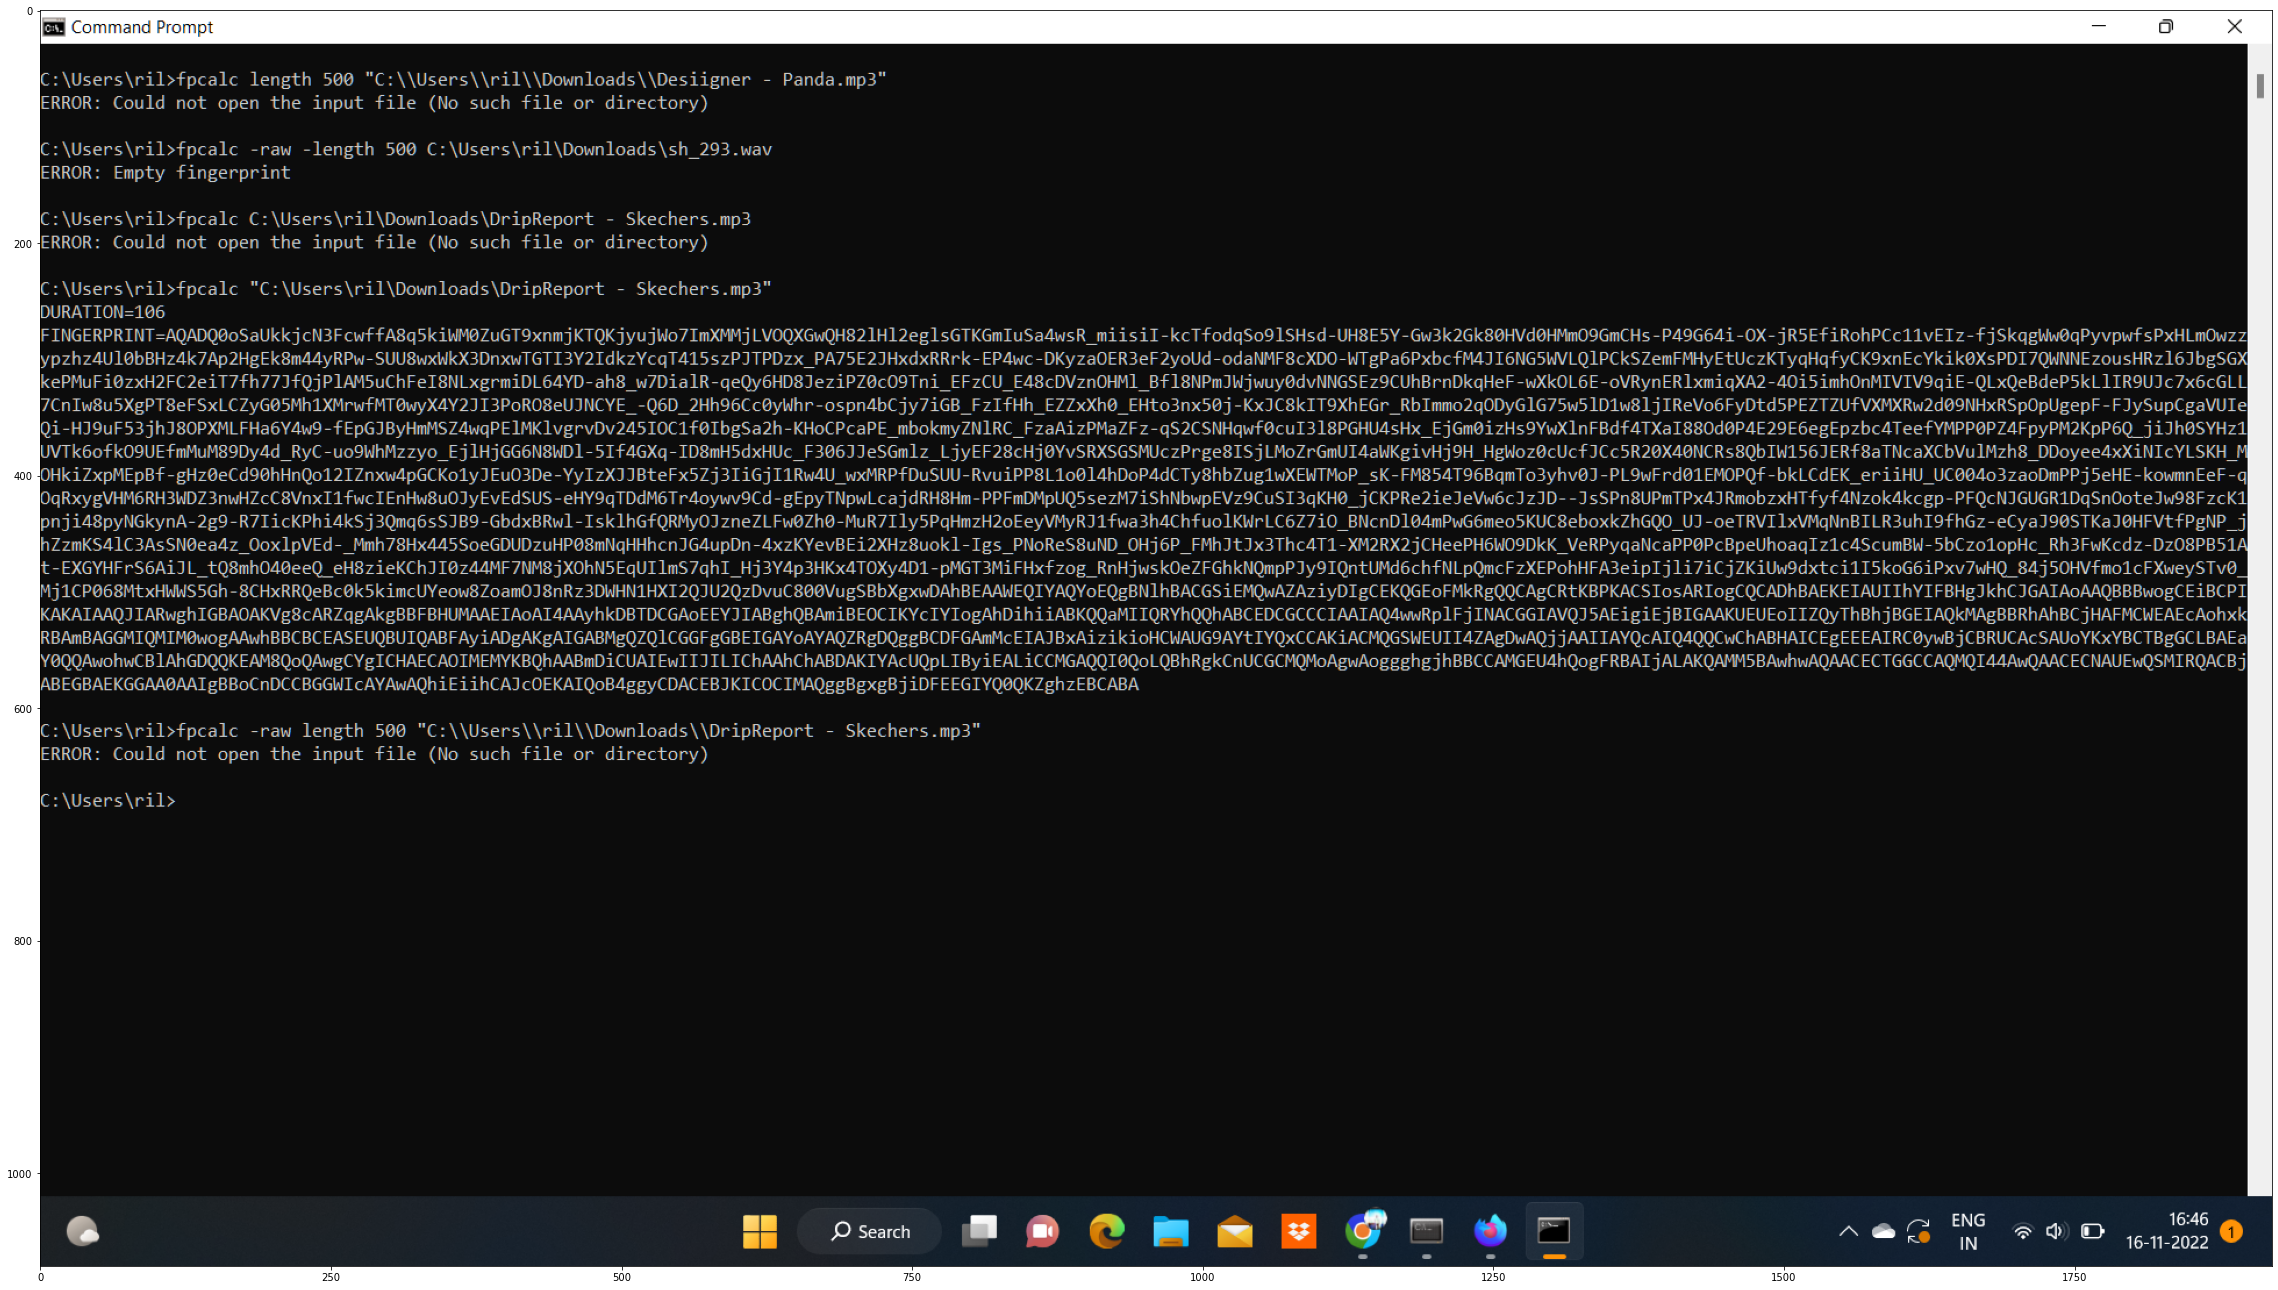

In [61]:
plt.figure(figsize = (40,40))
plt.imshow(img)